In [2]:
import pandas

In [3]:
dataset = pandas.read_csv("power.csv", header=1,
                         names=['Time', 'Bus', 'Shunt', 'Load', 'Current', 'Power'])

In [4]:
dataset.set_index('Time', inplace=True)

In [5]:
cleanset = dataset[dataset.Current < 7.5]

Text(3400, 3.4, '5 sec')

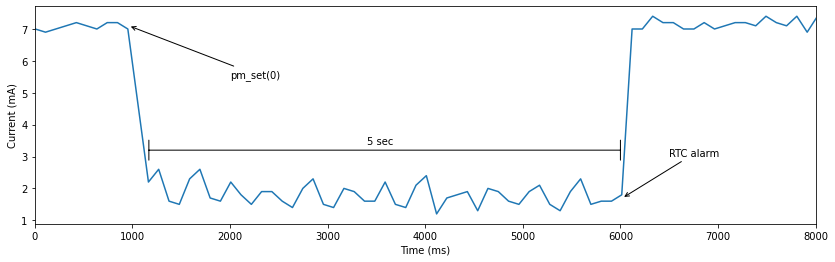

In [27]:
ax = cleanset.Current.plot(figsize=(14,4), label='Current (mA)')
ax.set_ylabel('Current (mA)')
ax.set_xlabel('Time (ms)')
ax.set_xlim(0, 8000)
ax.annotate("pm_set(0)", xy=(966, 7.1), xytext=(2000, 5.5),
            arrowprops=dict(facecolor='red', arrowstyle='->'))
ax.annotate("RTC alarm", xy=(6020, 1.7), xytext=(6500, 3),
            arrowprops=dict(facecolor='red', arrowstyle='->'))
ax.annotate("", xy=(1150, 3.2), xytext=(6020, 3.2),
            arrowprops=dict(facecolor='red', arrowstyle='|-|'))
ax.annotate('5 sec',
            xy=(3400, 3.4))

In [ ]:
ax.savefig('')

In [32]:
cleanset['diff'] = cleanset.Current.diff()

<ipython-input-32-fea229199749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanset['diff'] = cleanset.Current.diff()


In [35]:
cleanset['dblediff'] = cleanset['diff'].diff()

<ipython-input-35-ea9303483eb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanset['dblediff'] = cleanset['diff'].diff()


In [42]:
cleanset['absdiff'] = abs(cleanset.dblediff)

<ipython-input-42-27959a9cbbee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanset['absdiff'] = abs(cleanset.dblediff)


In [51]:
cleanset[cleanset.absdiff > 1]

,Bus,Shunt,Load,Current,Power,diff,dblediff,absdiff
Time,,,,,,,,
1166,3.13,0.20,3.13,2.2,6.0,-4.8,-4.6,4.6
1271,3.14,0.21,3.14,2.6,6.0,0.4,5.2,5.2
1377,3.18,0.17,3.18,1.6,6.0,-1.0,-1.4,1.4
1798,3.13,0.17,3.13,1.7,4.0,-0.9,-1.2,1.2
2114,3.17,0.24,3.17,1.8,6.0,-0.4,-1.0,1.0
2958,3.17,0.13,3.17,1.5,4.0,-0.8,-1.1,1.1
3695,3.17,0.18,3.17,1.5,4.0,-0.7,-1.3,1.3
4117,3.17,0.16,3.17,1.2,4.0,-1.2,-1.5,1.5
4222,3.18,0.15,3.18,1.7,6.0,0.5,1.7,1.7
